An example that simulates the refletance of a silicon nitride thinfilm stacked on a silicon substrate over a range of wavelengths.

In [7]:
import numpy as np
from materials import Material
from thinfilm import OpticalAssembly

In [8]:
# Setup range of wavelengths
wavelengths = np.arange(400, 800, 1)

To crate the material obejcts we specify the index of refraction and extenction coefficent in the object construtor.
```
material = Material(index of refraction, extinction coefficent)
```
If a wavelength vs. index of refreaction curve is available then provide the file name in place of the value. 

In [9]:
# Create materials
substrate_material = Material("materials/Si.txt", "materials/Si.txt")
thin_film_material = Material("materials/Si3N4.txt", "materials/Si3N4.txt")
air_material = Material(1.0, 0.0)

Now we can create the optical assembly. We need to specify the range of wavelengths of light shining at the stack, the material of the substrate, the incident angle of the rays of light to the stack (measured from the vertical), and wether or not to use p or s polarized waves when modeling the rays of light.
```
assembly = OpticalAssembly(wavelengths, substrate material, angle of incidence, should model with p-waves)
```

When we can then stack a thin film ontop of the substrate, specifcying the material and thickness of the film.
```
assembly.stack_thin_film(material of film, thickness of film in nm)
```

In [10]:
# Create optical assembly
assembly = OpticalAssembly(wavelengths, substrate_material, 0, False)

# Stack thin film
assembly.stack_thin_film(thin_film_material, 84)

array([[[-0.91904483-0.00000000e+00j, -0.91610169-0.00000000e+00j,
         -0.91312336-0.00000000e+00j, ...,  0.23720426-0.00000000e+00j,
          0.23886316-0.00000000e+00j,  0.24051721-0.00000000e+00j],
        [ 0.        +7.15996119e+01j,  0.        +7.28490432e+01j,
          0.        +7.40888994e+01j, ...,  0.        +1.82045651e+02j,
          0.        +1.81974896e+02j,  0.        +1.81903798e+02j]],

       [[ 0.        +2.16979662e-03j,  0.        +2.20672346e-03j,
          0.        +2.24332846e-03j, ...,  0.        +5.18405209e-03j,
          0.        +5.18172789e-03j,  0.        +5.17939419e-03j],
        [-0.91904483-0.00000000e+00j, -0.91610169-0.00000000e+00j,
         -0.91312336-0.00000000e+00j, ...,  0.23720426-0.00000000e+00j,
          0.23886316-0.00000000e+00j,  0.24051721-0.00000000e+00j]]])

We can then calculaute the reflectance of our optical stack at all of the wavelengths we passed in. We just need to specify the material above the optical stack which is usually air.
```
reflectances = assembly.calculate_assembly_reflectance(material above stack)
```

In [11]:
# Calculate reflectance
R = assembly.calculate_assembly_reflectance(air_material)

Finally, we can plot reflectance vs. wavelength.

c:\Users\cttew\Desktop\code\nano\venv\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


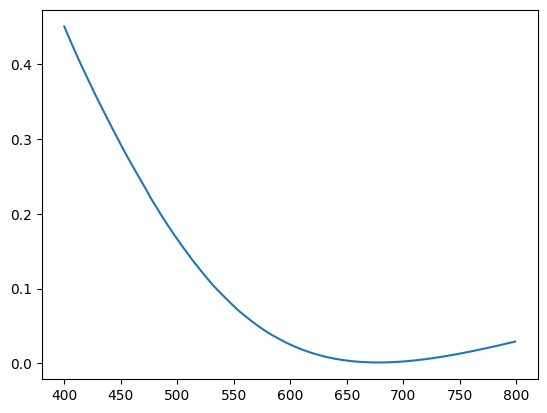

In [12]:
# Plot reflectance
import matplotlib.pyplot as plt

plt.plot(wavelengths, R)
plt.show()